In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [2]:
unemployment_data = "Output/fileOne.csv"

In [3]:
df = pd.read_csv(unemployment_data)
len(df)

132

In [4]:
years = df['Year'].unique()
monthnumber = [ ]

for year in years:
    month = 13
    while (month > 1): 
        month = month -1
        monthnumber.append(month)
        if  month == 0:
            break
df['Month #'] = monthnumber

In [5]:
education_df = df[['Year', 'Month #', 'Month', 'Unemployment Rate for 25yo and older with less than High School Diploma',
                  'Unemployment Rate for 25yo and older with High School Degree', 
                  'Unemployment Rate for 25yo and older with some college',
                  "Unemployment Rate for 25yo and older with Bachelor's degree or higher"]]

education_df = education_df.rename(columns={'Unemployment Rate for 25yo and older with less than High School Diploma': "No High School Diploma",
                                           'Unemployment Rate for 25yo and older with High School Degree': 'High School Graduate',
                                           'Unemployment Rate for 25yo and older with some college': 'Some College',
                                           "Unemployment Rate for 25yo and older with Bachelor's degree or higher": "Bachelor's Degree or Higher"})
education_df.head()

,Year,Month #,Month,No High School Diploma,High School Graduate,Some College,Bachelor's Degree or Higher
0,2018,12,December,5.8,3.8,3.3,2.2
1,2018,11,November,5.6,3.5,3.1,2.2
2,2018,10,October,5.9,4.0,3.1,2.0
3,2018,9,September,5.7,3.8,3.2,2.0
4,2018,8,August,5.7,3.9,3.5,2.0


In [6]:
date = []

for index, row in education_df.iterrows():
    datenumber = str(f"{row['Year']}-{row['Month #']}")
    date.append(datenumber)

education_df['Date'] = date

education_df = education_df[['Year', 'Month #', 'Month', 'Date', 'No High School Diploma', 'High School Graduate',
                            'Some College', "Bachelor's Degree or Higher"]]
                     
education_df = education_df.reindex(index=education_df.index[::-1])
education_df.head()

,Year,Month #,Month,Date,No High School Diploma,High School Graduate,Some College,Bachelor's Degree or Higher
131,2008,1,January,2008-1,7.7,4.7,3.7,2.1
130,2008,2,February,2008-2,7.4,4.7,3.8,2.0
129,2008,3,March,2008-3,8.4,5.1,3.9,2.1
128,2008,4,April,2008-4,7.7,5.0,4.0,2.1
127,2008,5,May,2008-5,8.1,5.0,4.3,2.2


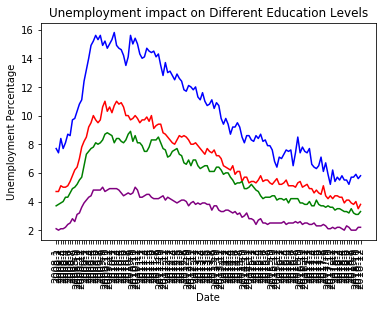

In [25]:
yearcount = range(10)

nohighschool = plt.plot(education_df['Date'], education_df['No High School Diploma'], color='blue')
highschool = plt.plot(education_df['Date'], education_df['High School Graduate'], color='red')
somecollege = plt.plot(education_df['Date'], education_df['Some College'], color='green')
college = plt.plot(education_df['Date'], education_df["Bachelor's Degree or Higher"], color='purple')
plt.title('Unemployment impact on Different Education Levels')
plt.ylabel('Unemployment Percentage')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.show()

In [8]:
bareducation_df = education_df
bareducation_df

,Year,Month #,Month,Date,No High School Diploma,High School Graduate,Some College,Bachelor's Degree or Higher
131,2008,1,January,2008-1,7.7,4.7,3.7,2.1
130,2008,2,February,2008-2,7.4,4.7,3.8,2.0
129,2008,3,March,2008-3,8.4,5.1,3.9,2.1
128,2008,4,April,2008-4,7.7,5.0,4.0,2.1
127,2008,5,May,2008-5,8.1,5.0,4.3,2.2
...,...,...,...,...,...,...,...,...
4,2018,8,August,2018-8,5.7,3.9,3.5,2.0
3,2018,9,September,2018-9,5.7,3.8,3.2,2.0
2,2018,10,October,2018-10,5.9,4.0,3.1,2.0
1,2018,11,November,2018-11,5.6,3.5,3.1,2.2


In [46]:
yearinfo = education_df[['Year', 'No High School Diploma', 'High School Graduate', 'Some College', "Bachelor's Degree or Higher"]]

year_groupby= yearinfo.groupby('Year')['No High School Diploma', 'High School Graduate', 
                                       'Some College', "Bachelor's Degree or Higher"].mean()


year_groupby

,No High School Diploma,High School Graduate,Some College,Bachelor's Degree or Higher
Year,,,,
2008,9.025000,5.683333,4.575000,2.558333
2009,14.666667,9.733333,7.958333,4.608333
2010,14.841667,10.291667,8.383333,4.708333
2011,14.075000,9.425000,7.966667,4.308333
2012,12.391667,8.308333,7.100000,4.025000
2013,10.958333,7.508333,6.366667,3.700000
2014,9.016667,6.008333,5.425000,3.175000
2015,7.941667,5.441667,4.508333,2.566667
2016,7.433333,5.191667,4.083333,2.508333


Text(0.5, 1.0, 'Unemployment Impact on Different Levels of Education')

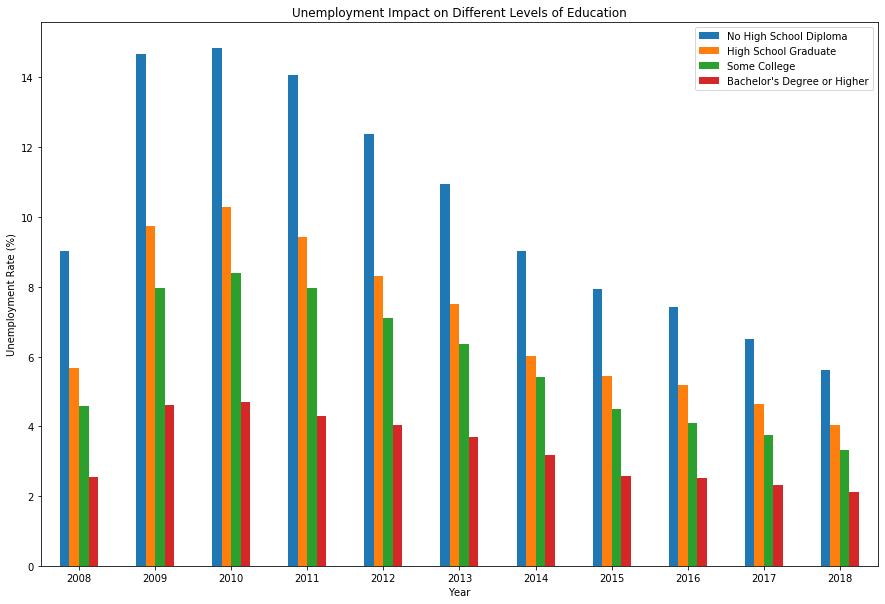

In [51]:
year_groupby.plot.bar(rot=0, figsize=(15, 10))
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Impact on Different Levels of Education")